In [1]:
import pandas as pd
import nltk
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Restaurant_Reviews.tsv', delimiter= '\t')

In [3]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [5]:
nltk.download ('stopwords')

[nltk_data] Downloading package stopwords to /Users/gabru/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# stopwords

In [7]:
from nltk.corpus import stopwords

In [8]:
stop_words=stopwords.words('english')

In [9]:
# stemmer 

In [10]:
from nltk.stem.porter import PorterStemmer

In [11]:
ps=PorterStemmer()

In [12]:
ps

<PorterStemmer>

In [13]:
ps.stem('loved')

'love'

In [14]:
review= df['Review'][0]

In [15]:
# remove punctuation 

In [16]:
review = re.sub('[^a-zA-Z]', ' ', review)

In [17]:
review

'Wow    Loved this place '

In [18]:
review= review.split()

In [19]:
review

['Wow', 'Loved', 'this', 'place']

In [20]:
review=[i for i in review if i not in stop_words]

In [21]:
review

['Wow', 'Loved', 'place']

In [22]:
review= [ps.stem(i) for i in review]

In [23]:
review

['wow', 'love', 'place']

In [24]:
review =[ps.stem(i) for i in review if i not in stop_words]

In [25]:
review

['wow', 'love', 'place']

In [30]:
review= ''.join(review)

In [31]:
review = []
for i in range (0,1000):
    l= re.sub('[^a-zA-Z]', ' ', df['Review'][i]).lower().split()
    l=[ps.stem(i) for i in l if i not in stop_words]
    review.append(' '.join(l))
    

In [32]:
review

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer(max_features= 1500)
X= cv.fit_transform(review).toarray()

In [34]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
X.shape

(1000, 1500)

In [36]:
y= df['Liked'].values

In [37]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3)

In [39]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()

In [40]:
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
ynb_pred= nb.predict(X_test)

In [48]:
from sklearn. metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,ynb_pred))

[[ 88  50]
 [ 39 123]]


In [49]:
print(classification_report(y_test,ynb_pred))

              precision    recall  f1-score   support

           0       0.69      0.64      0.66       138
           1       0.71      0.76      0.73       162

    accuracy                           0.70       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.70      0.70      0.70       300



In [62]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors= 12)

In [63]:
knn.fit(X_train,y_train)
yknn_pred= knn.predict(X_test)
confusion_matrix(y_test,yknn_pred)


array([[125,  13],
       [ 91,  71]])

In [64]:
print(classification_report(y_test,yknn_pred))

              precision    recall  f1-score   support

           0       0.58      0.91      0.71       138
           1       0.85      0.44      0.58       162

    accuracy                           0.65       300
   macro avg       0.71      0.67      0.64       300
weighted avg       0.72      0.65      0.64       300



In [45]:
error_rate=[]
for i in range (1,40):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train,y_train)
        pred_i = knn.predict(X_test)
        error_rate.append(np.mean(pred_i != y_test))

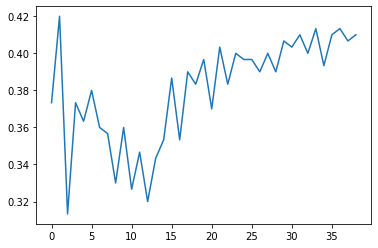

In [46]:
plt.plot(error_rate)